In [1]:
import sys, os
sys.path.insert(1, '/nfs/cms/martialc/DTUpgrade/src')

%load_ext autoreload
%autoreload 2

In [2]:
import dtupy_analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from copy import deepcopy
from pathlib import Path
from tqdm.notebook import tqdm
from scipy.optimize import curve_fit
import builtins
import time
import itertools

import dtupy_analysis.dqm as dqm
from dtupy_analysis.dqm.reco import MuSGO, MuSTIO, MuSE, SegDF
from dtupy_analysis.dqm import units as u


In [3]:
file_path = '/nfs/cms/martialc/DTUpgrade/data/testpulse_240802.parquet'
file_path = '/nfs/cms/martialc/DTUpgrade/data/cosmic_240904_long.seg'
file_path = Path(file_path)

src_seg_df = SegDF.read_parquet(file_path.with_stem(file_path.stem+'_100'))

In [6]:
with dqm.reco.MuSTIO(file_path, batch_size=100) as mustio:
    mustio.fit('test', nmax=10, debug=True)

Submitted:   0%|          | 0/10 [00:00<?, ?task(s)/s]

Completed:   0%|          | 0/10 [00:00<?, ?task(s)/s]

Post-processed:   0%|          | 0/10 [00:00<?, ?task(s)/s]


Submitting 0
Fitting 10 segments

Submitting 1
Fitting 14 segments

Submitting 2
Fitting 16 segments

Submitting 3
Fitting 23 segments

Submitting 4
Fitting 20 segments

Submitting 5
Fitting 11 segments

Submitting 6
Fitting 12 segments

Submitting 7
MuSGO has been made successfully!
Fitting 7 segments

Submitting 8
Fitting 10 segments

Submitting 9
Fitting 19 segments
MuSGO has been made successfully!
MuSGO has been made successfully!
MuSGO has been made successfully!
MuSGO has been made successfully!MuSGO has been made successfully!

MuSGO has been made successfully!
MuSGO has been made successfully!
MuSGO has been made successfully!
MuSGO has been made successfully!
MuSGO has been fitted successfully!
        10: Writing 4 segments to disk
MuSGO has been fitted successfully!
        10: Writing 6 segments to disk
MuSGO has been fitted successfully!
        10: Writing 8 segments to disk
MuSGO has been fitted successfully!
        10: Writing 8 segments to disk
MuSGO has been fitted

In [41]:
with dqm.reco.MuSTIO(file_path, batch_size=100) as mustio:
    for i, data in enumerate(mustio):
        musgo = MuSGO(
            data, mustio.segments.get_segs(data),
            min_hits = 4,
            verbose=1
        )
        break
musgo

,st,sl,lnl,seg,nhits,min_hit,max_hit
3,1,2,4w3w2w1,"[683, 686, 685, 684]",4,683,686
12,1,2,4w3w2w1,"[384, 385, 386, 383]",4,383,386
22,1,2,4w3w2w1,"[707, 704, 703, 705]",4,703,707
24,1,2,4w3w2w1,"[699, 702, 701, 700]",4,699,702
32,1,2,4w3w2w1,"[1005, 1008, 1007, 1009]",4,1005,1009
37,1,2,4w3w2w1,"[691, 688, 687, 689]",4,687,691
43,1,2,4w3w2w1,"[368, 369, 370, 367]",4,367,370
50,1,2,4w3w2w1,"[1010, 1013, 1012, 1011]",4,1010,1013
75,1,1,4w3w2w1,"[359, 362, 361, 360]",4,359,362
85,1,1,4w3w2w1,"[375, 378, 377, 376]",4,375,378


  0%|          | 0/10 [00:00<?, ?it/s]

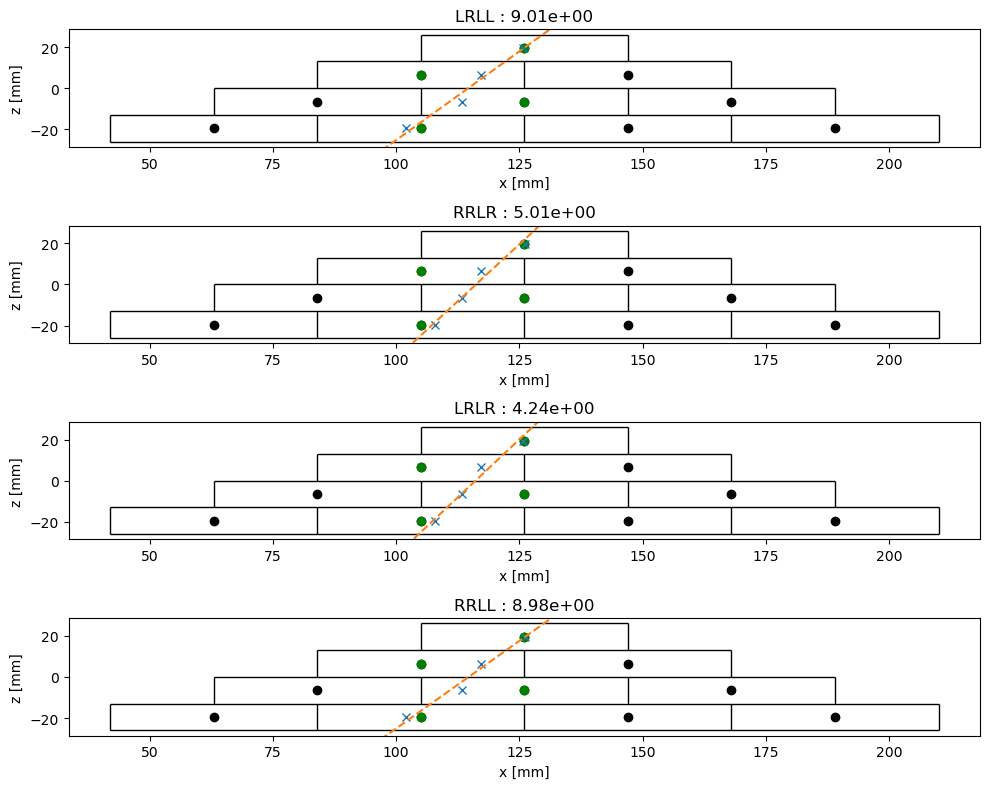

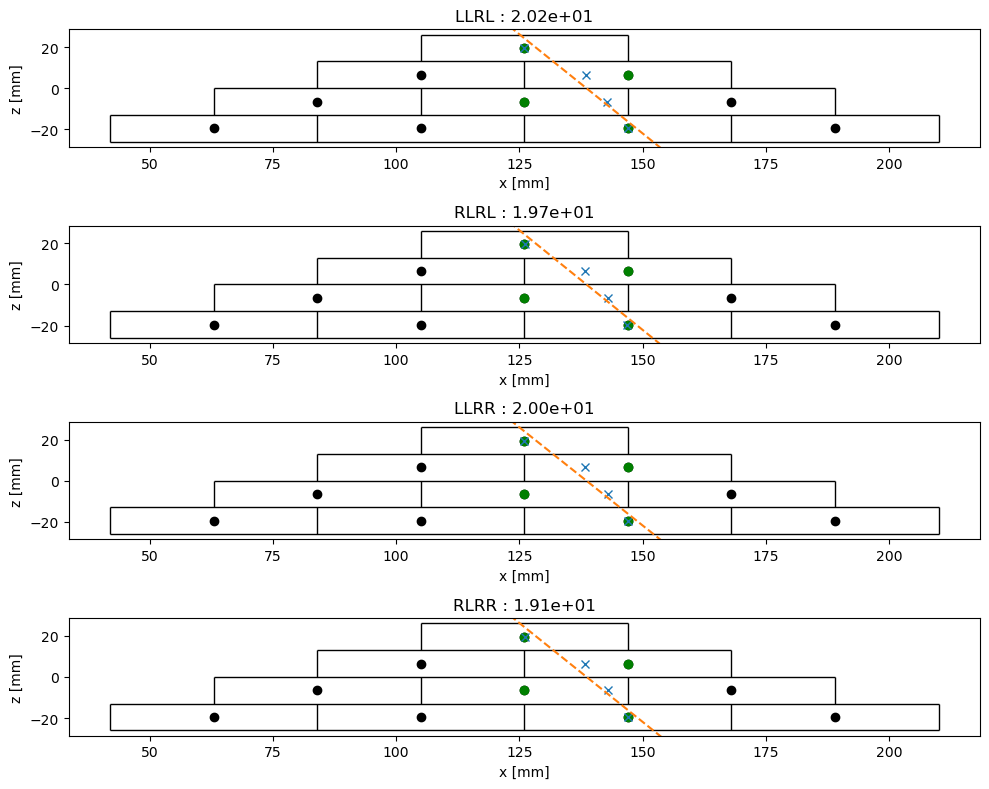

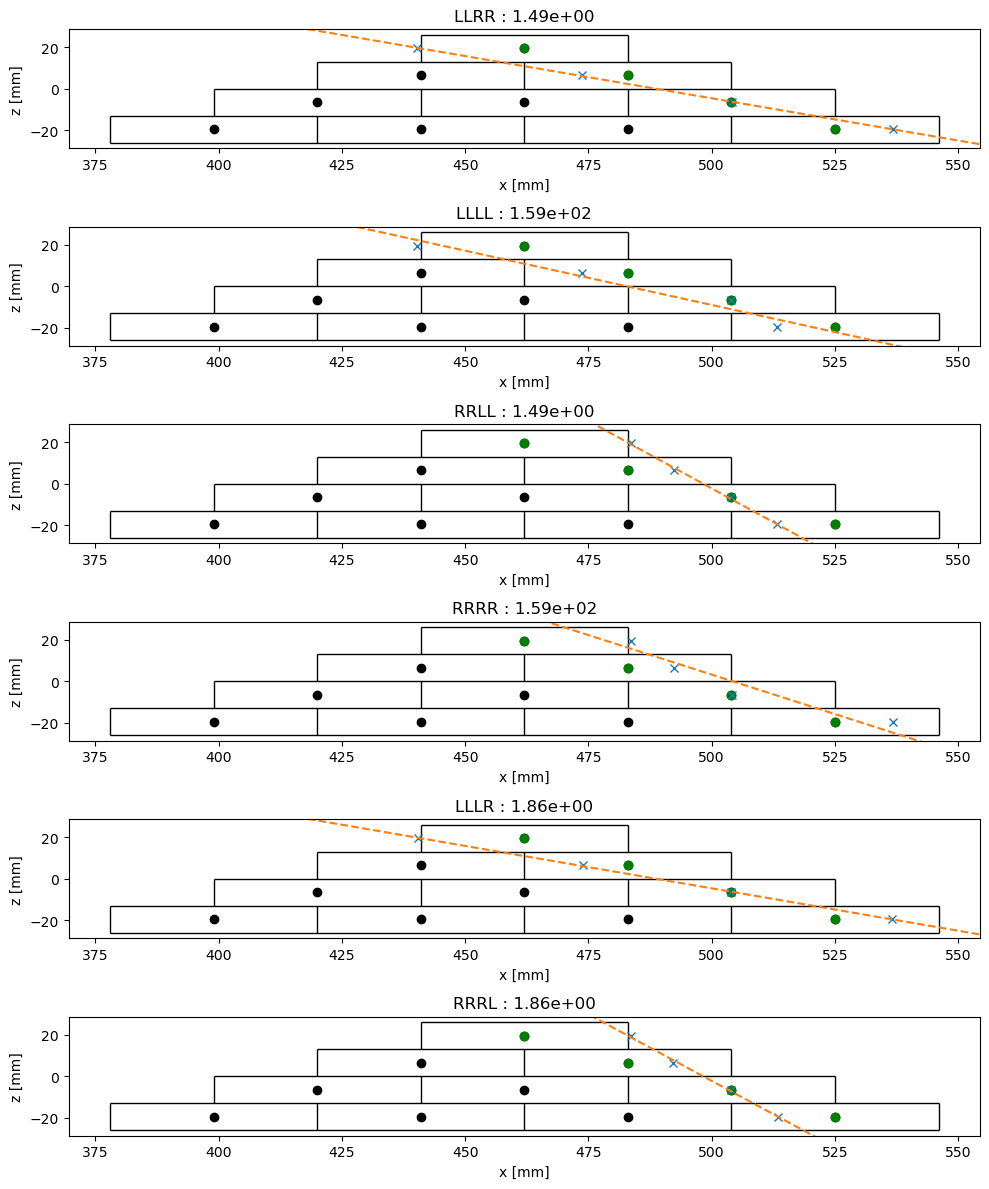

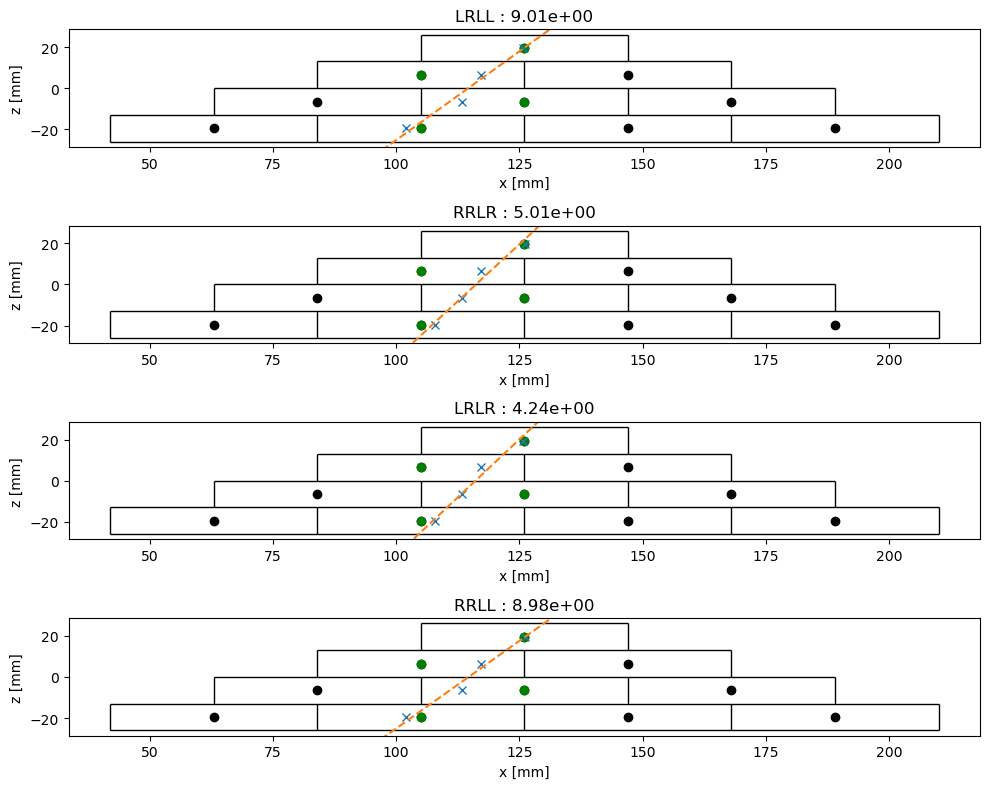

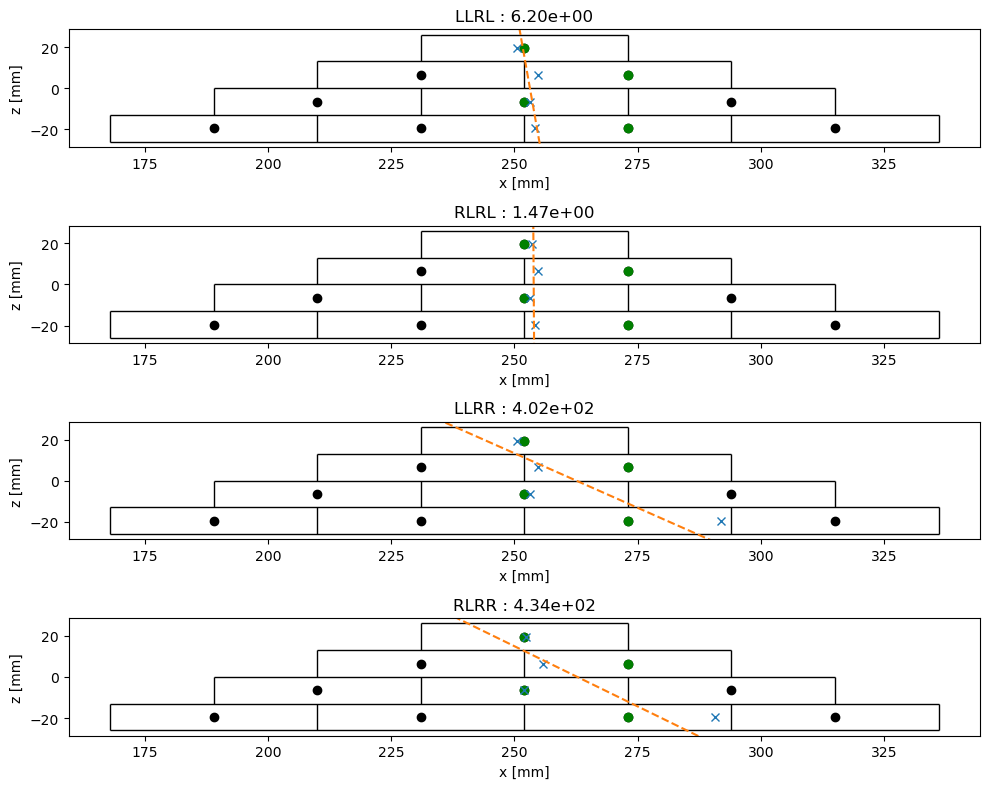

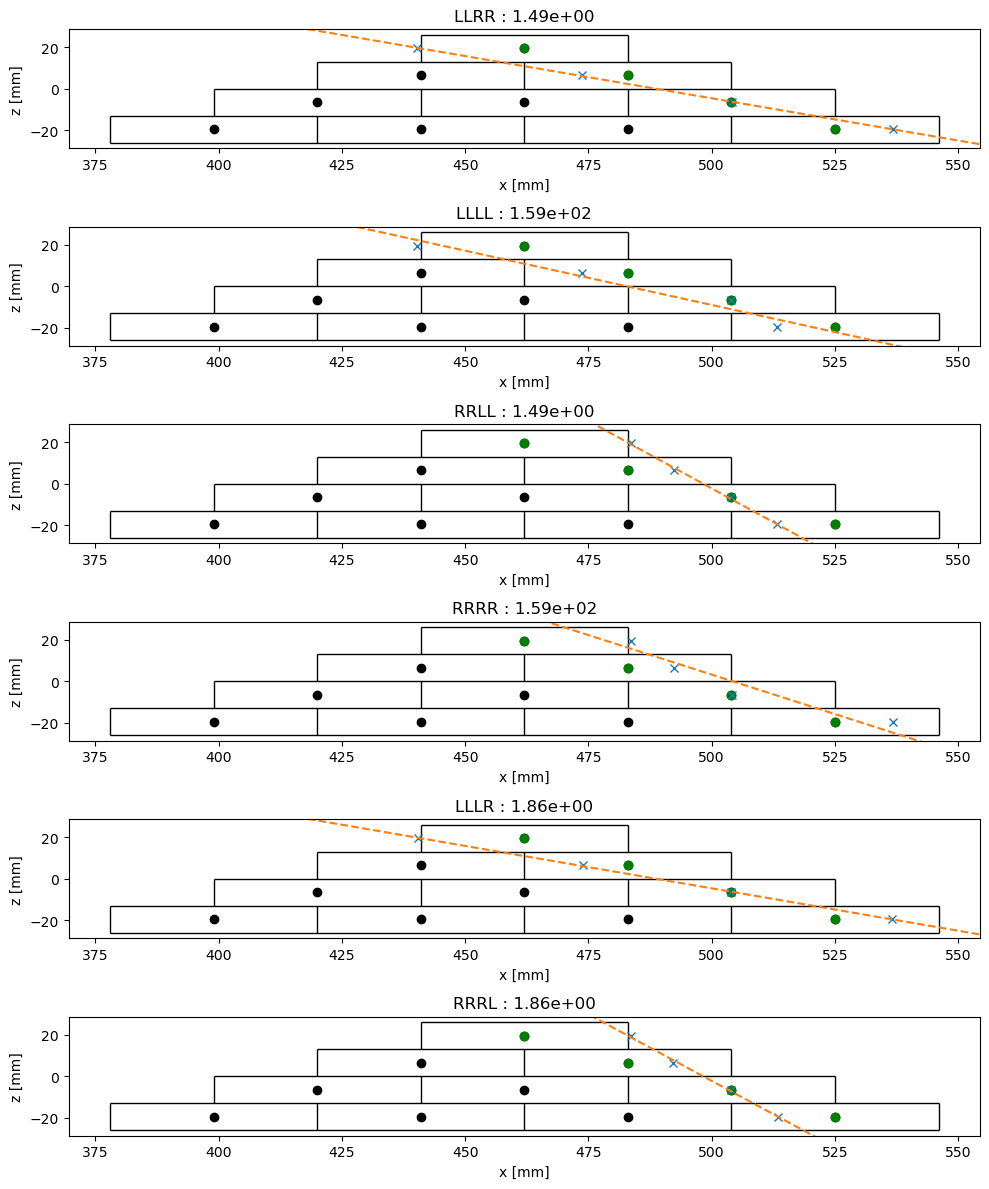

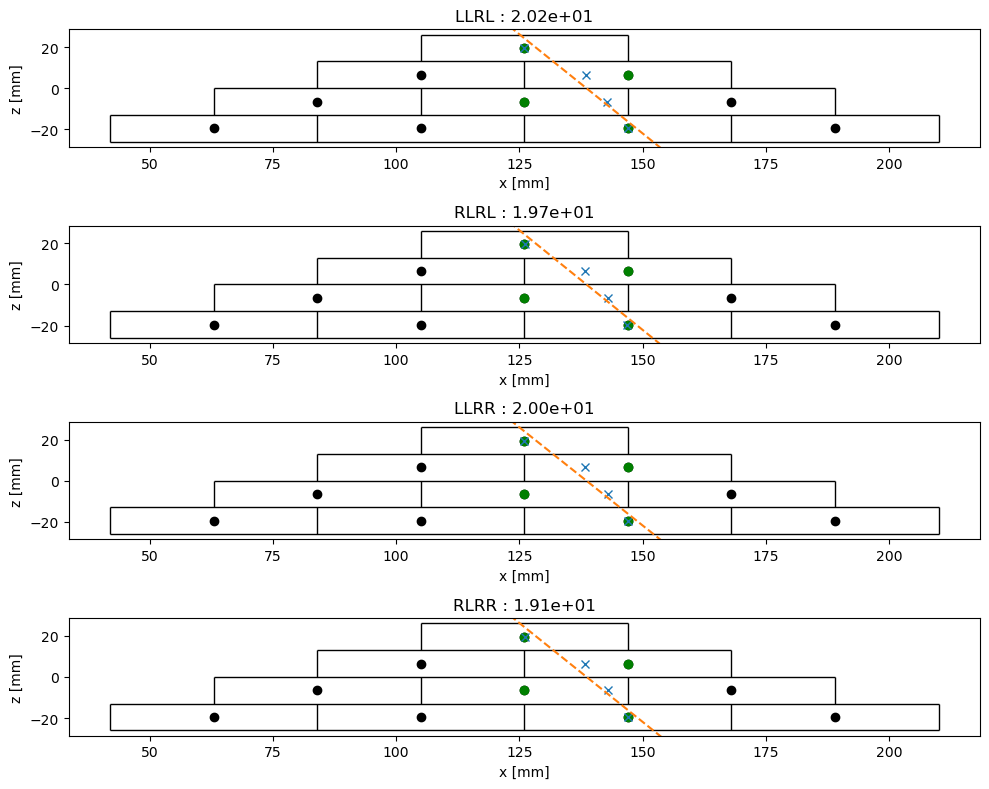

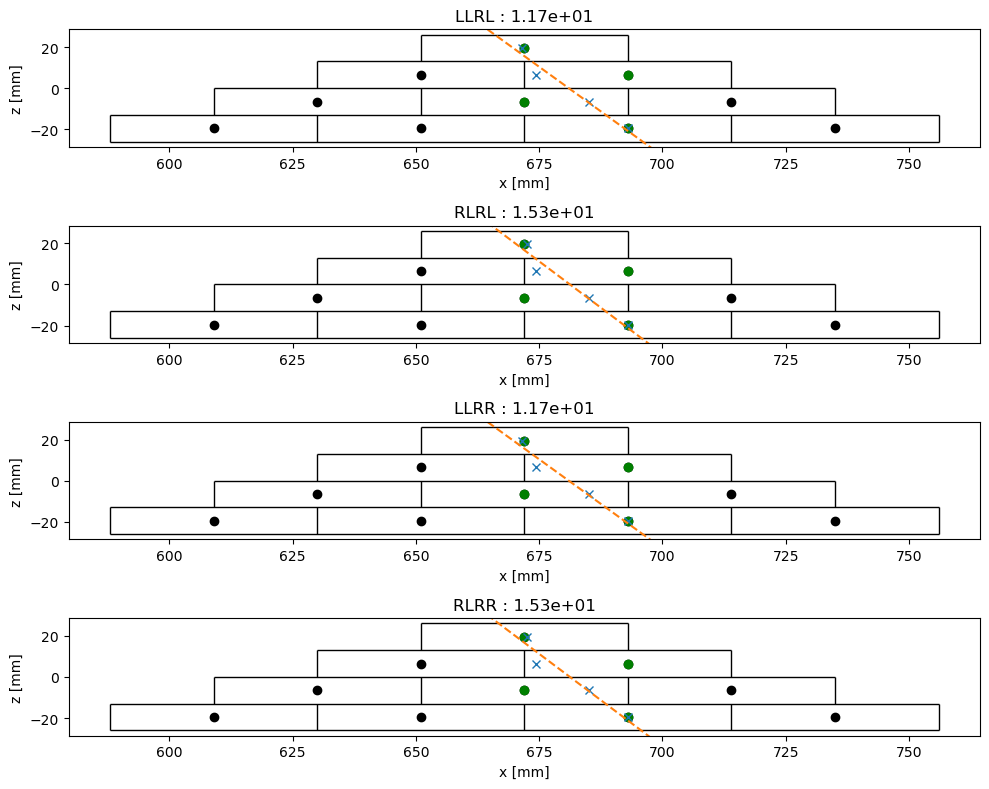

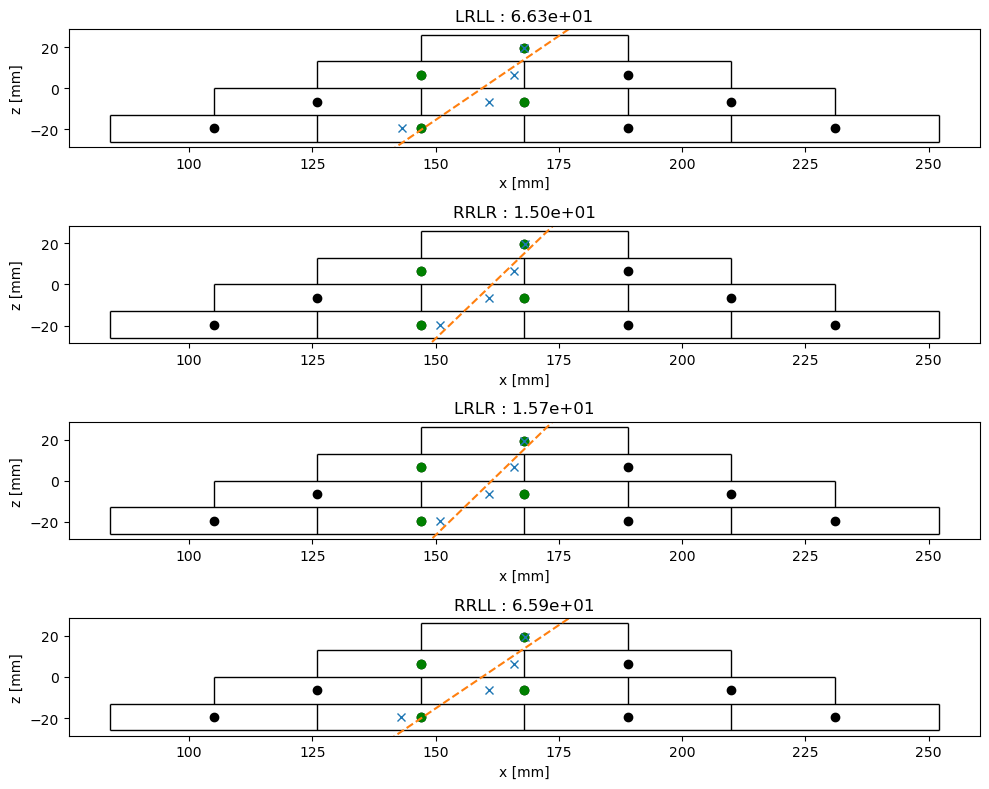

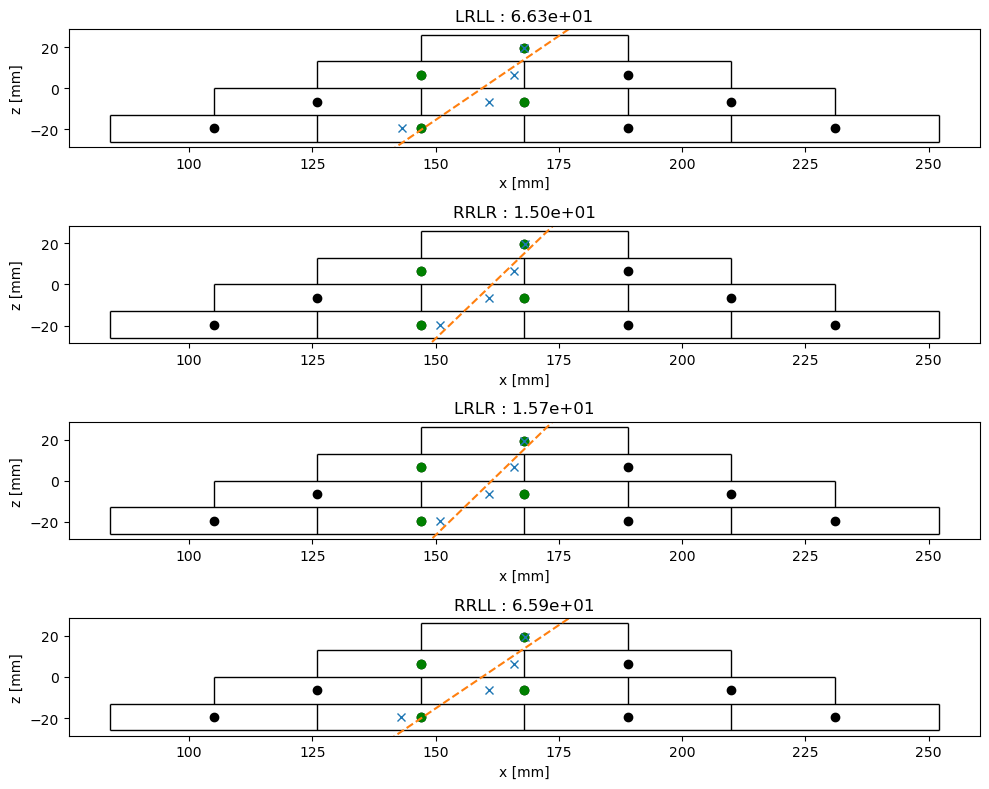

,seg_idx,st,sl,bx0,t4,t3,t2,t1,pattID,latsID,theta,x0,v,t0,chi2
0,3,1,2,3716012448,3.1250,225.78125,232.03125,53.90625,LRL,LRLR,0.417250,116.106738,0.0545,5.784929e-19,4.238981
1,12,1,2,3453559392,1.5625,158.59375,310.93750,1.56250,RLR,RLRR,-0.479455,138.618262,0.0545,8.581655e-20,19.148903
2,22,1,2,3717326336,398.4375,170.31250,3.12500,215.62500,RRR,RRLL,-0.656413,498.268750,0.0545,2.103958e-14,1.486575
3,24,1,2,3716012448,3.1250,225.78125,232.03125,53.90625,LRL,LRLR,0.417250,116.106738,0.0545,5.784929e-19,4.238981
4,32,1,2,4086520096,28.1250,335.15625,21.09375,345.31250,RLR,RLRL,-0.002758,253.899219,0.0545,3.155481e-18,1.465673
5,37,1,2,3717326336,398.4375,170.31250,3.12500,215.62500,RRR,RRLL,-0.656413,498.268750,0.0545,2.103958e-14,1.486575
6,43,1,2,3453559392,1.5625,158.59375,310.93750,1.56250,RLR,RLRR,-0.479455,138.618262,0.0545,8.581655e-20,19.148903
7,50,1,2,4090746720,20.3125,352.34375,250.78125,11.71875,RLR,LLRL,-0.523267,680.999121,0.0545,1.171875e+01,11.733476
8,75,1,1,3443185536,1.5625,346.87500,131.25000,72.65625,LRL,RRLR,0.409559,161.449121,0.0545,3.029807e-21,15.038583
9,85,1,1,3443185536,1.5625,346.87500,131.25000,72.65625,LRL,RRLR,0.409559,161.449121,0.0545,3.029807e-21,15.038583


In [34]:
musgo.fit(do_bar=True, do_plot=True)
musgo.flatten().astype({'pattID':'category', 'latsID':'category'})

In [42]:
with dqm.MuFile(file_path, batch_size=1e2,f_overlap=0.3) as file:
    for i, data in enumerate(file):
        break

In [43]:
segs = src_seg_df.get_segs(data)
musgo = MuSGO(data, mustio.segments.get_segs(data), min_hits = 4)

In [44]:
musgo

,st,sl,lnl,seg,nhits,min_hit,max_hit
3,1,2,4w3w2w1,"[683, 686, 685, 684]",4,683,686
12,1,2,4w3w2w1,"[384, 385, 386, 383]",4,383,386
22,1,2,4w3w2w1,"[707, 704, 703, 705]",4,703,707
24,1,2,4w3w2w1,"[699, 702, 701, 700]",4,699,702
32,1,2,4w3w2w1,"[1005, 1008, 1007, 1009]",4,1005,1009
37,1,2,4w3w2w1,"[691, 688, 687, 689]",4,687,691
43,1,2,4w3w2w1,"[368, 369, 370, 367]",4,367,370
50,1,2,4w3w2w1,"[1010, 1013, 1012, 1011]",4,1010,1013
75,1,1,4w3w2w1,"[359, 362, 361, 360]",4,359,362
85,1,1,4w3w2w1,"[375, 378, 377, 376]",4,375,378


  0%|          | 0/10 [00:00<?, ?it/s]

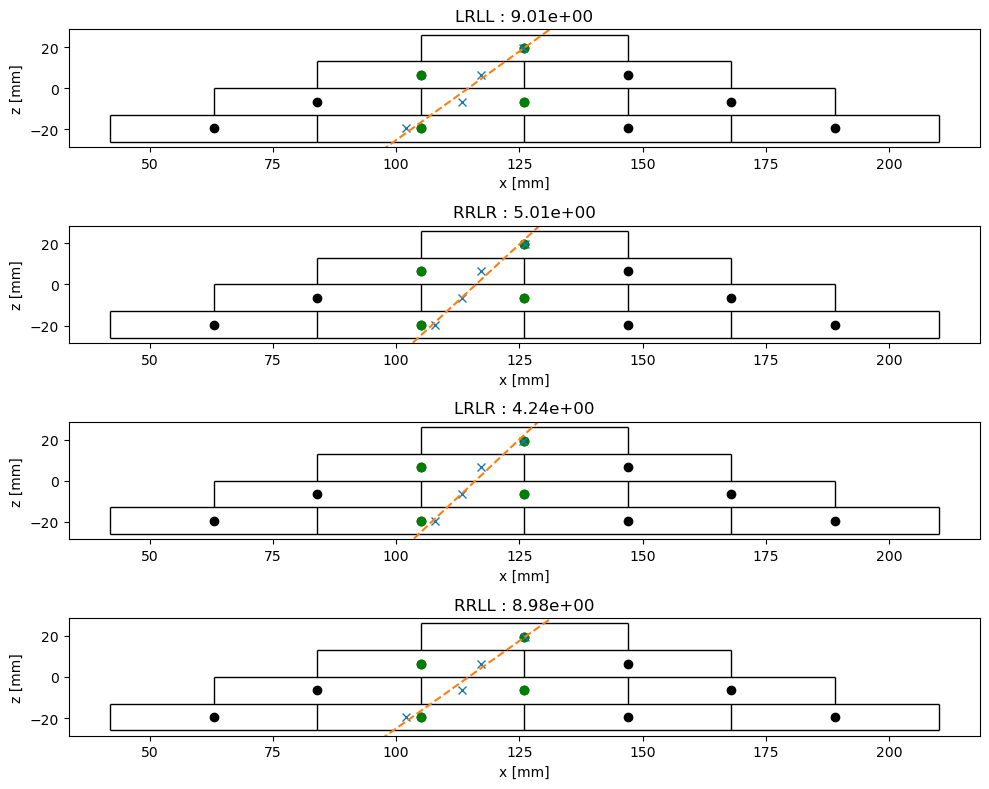

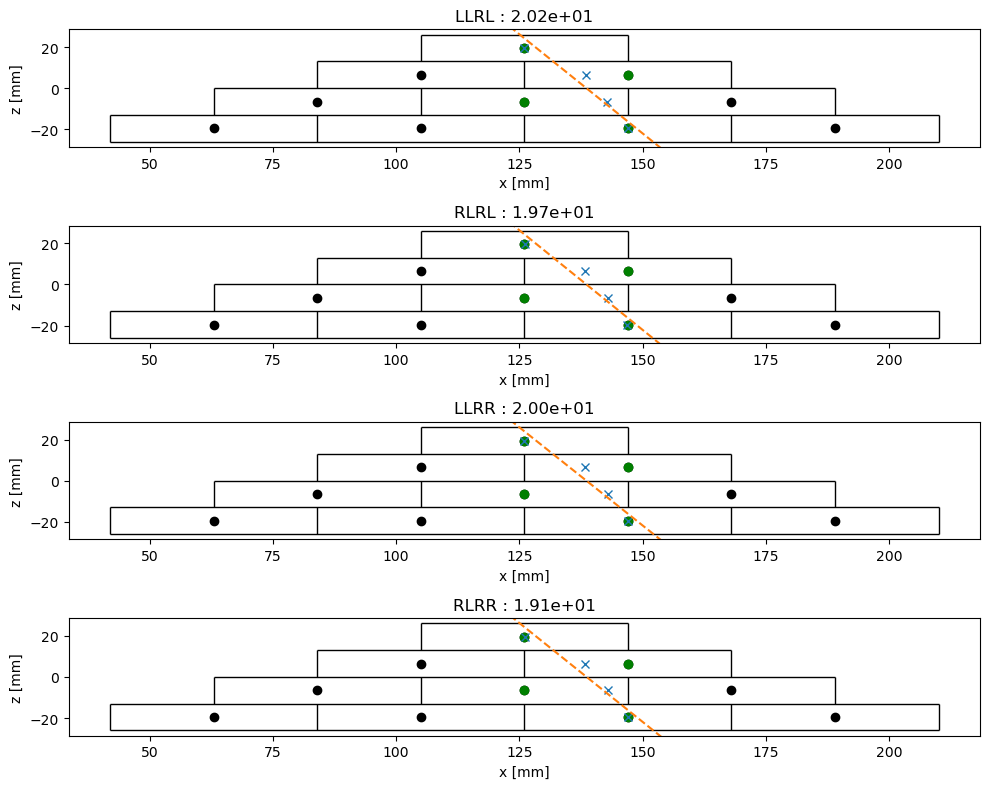

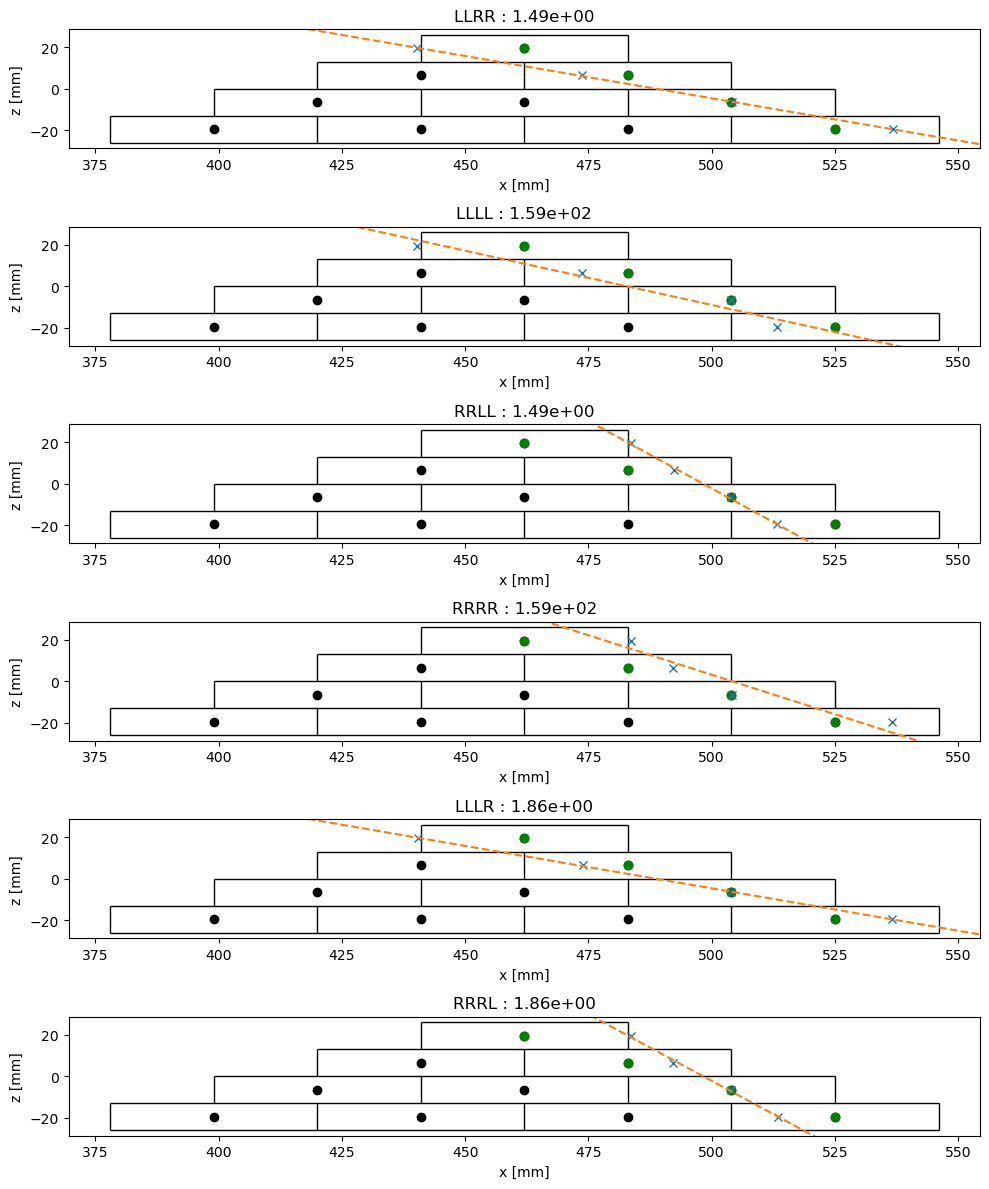

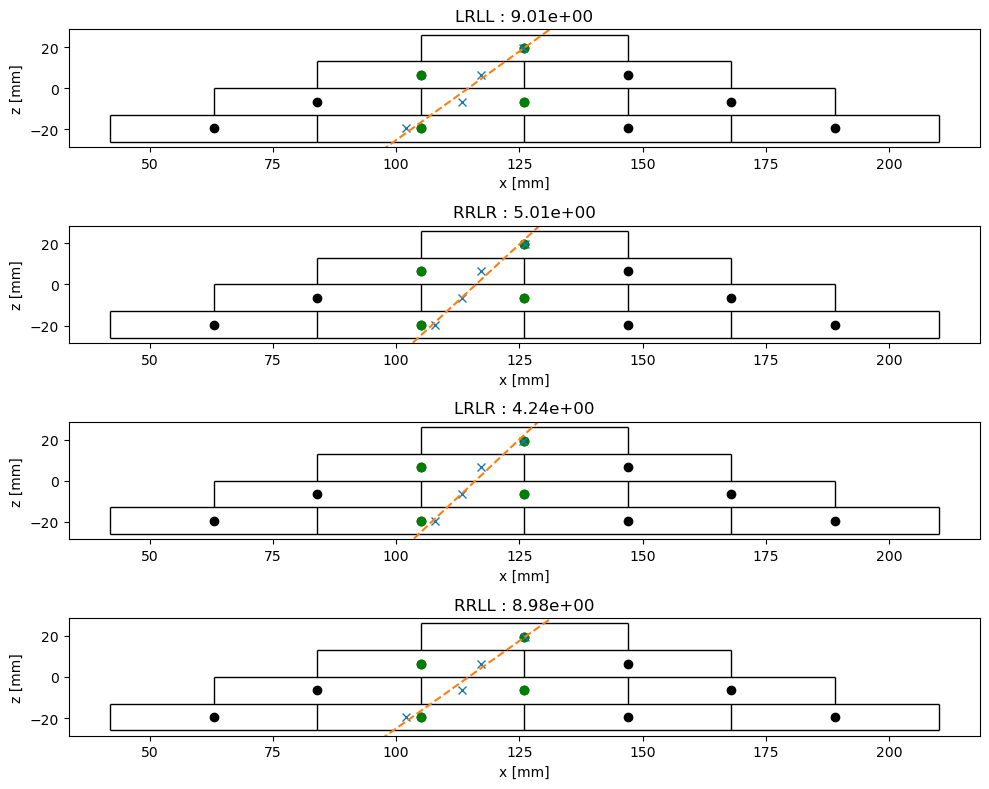

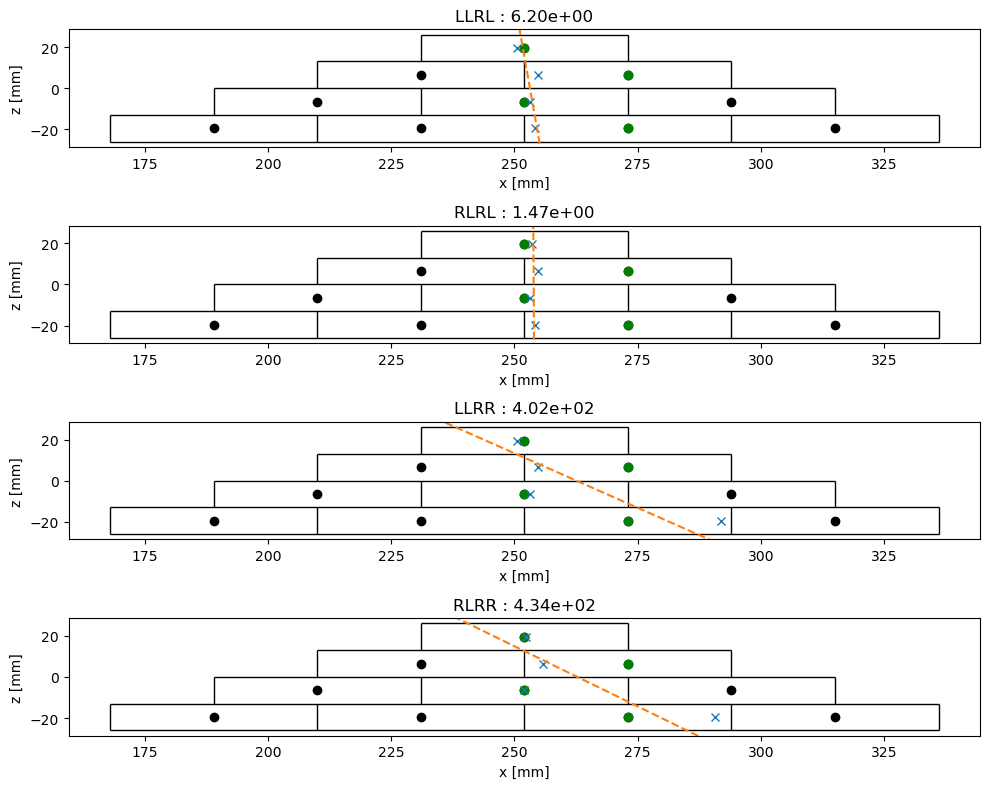

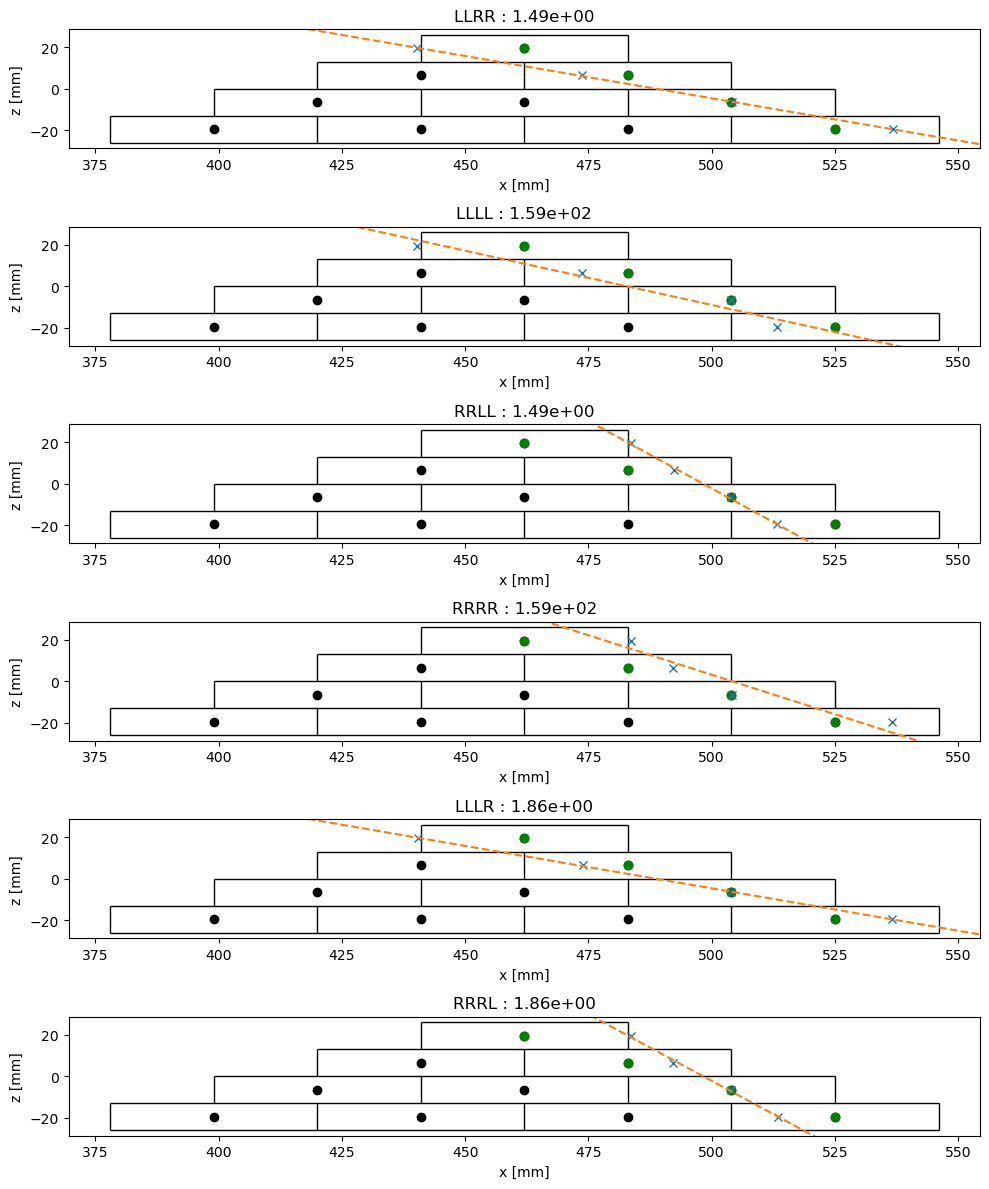

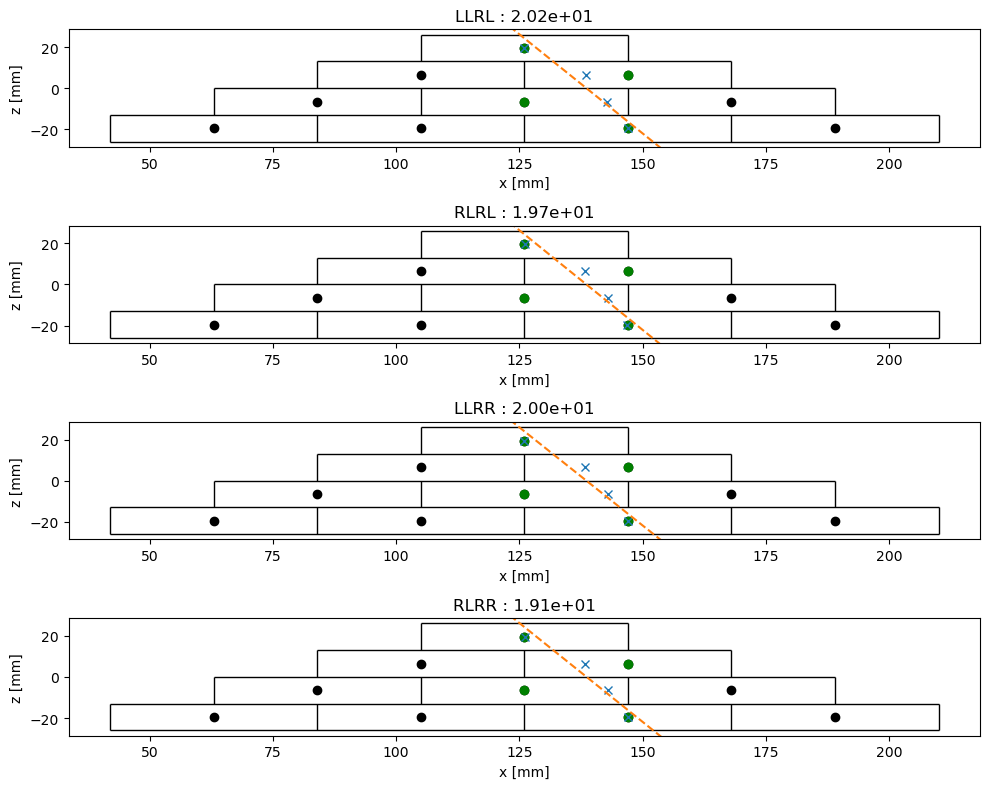

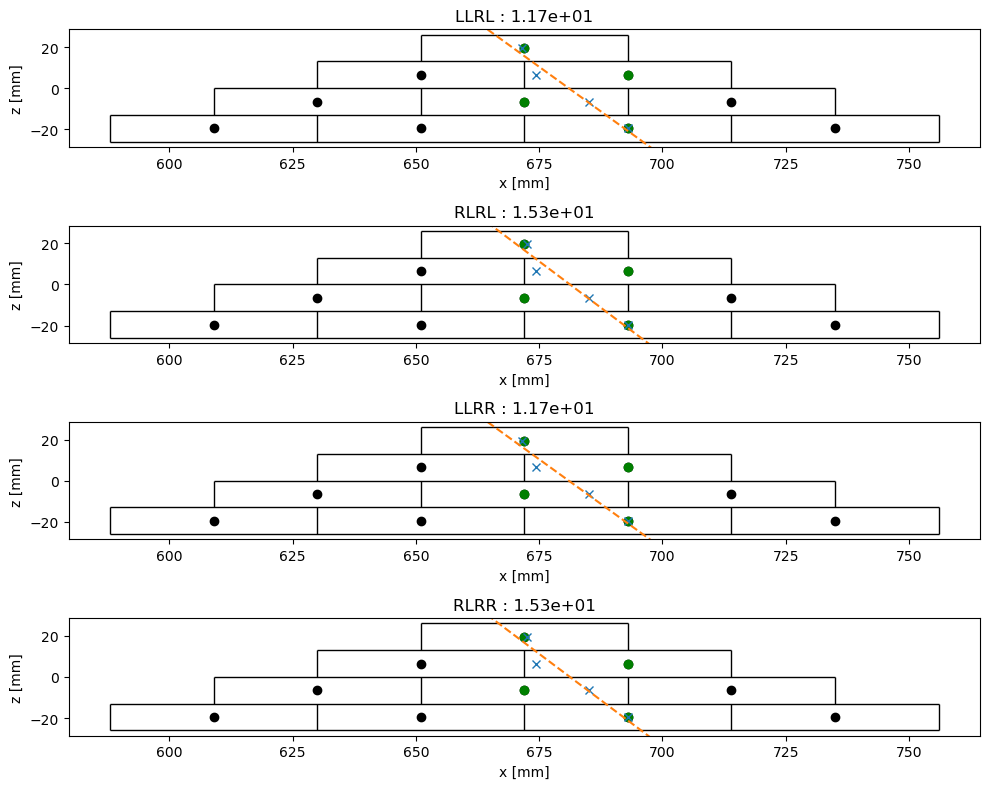

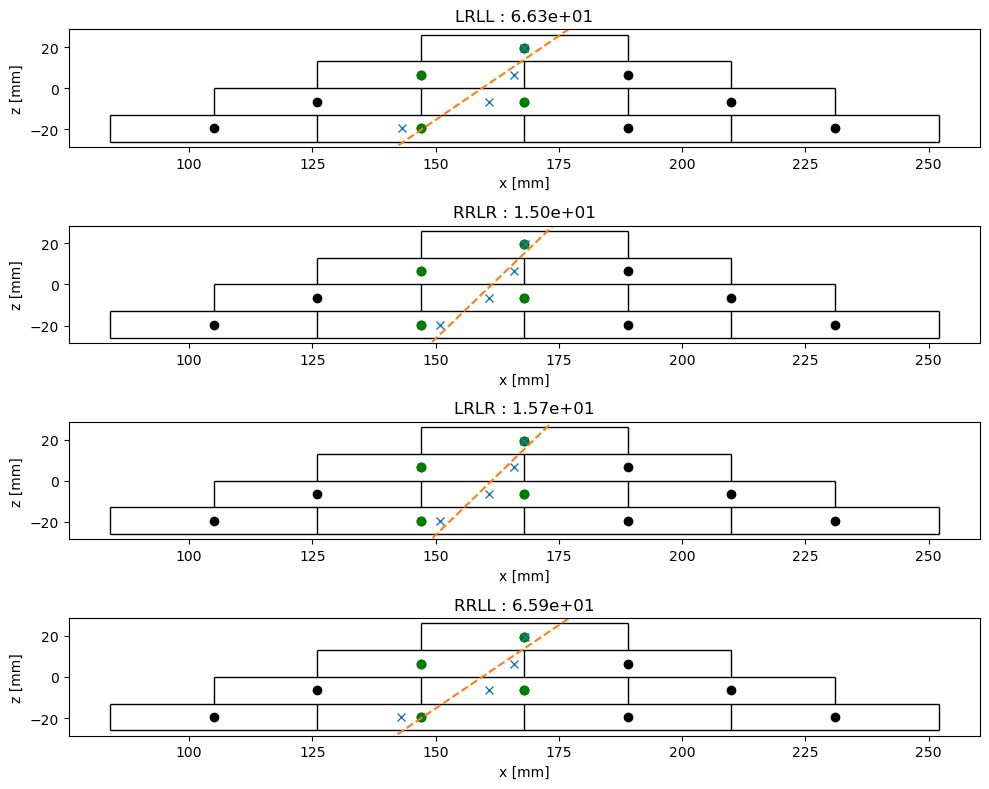

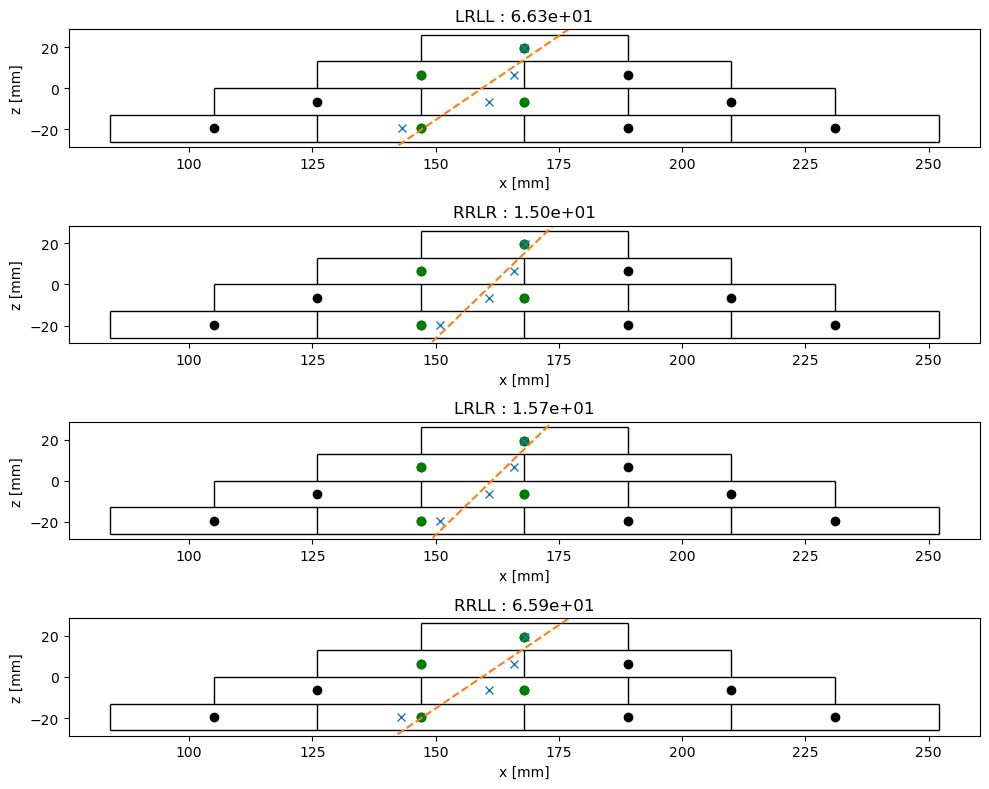

In [45]:
fits = musgo.fit(do_bar=True, do_plot=True)

In [17]:
musgo.flatten()

,seg_idx,st,sl,bx0,t4,t3,t2,t1,pattID,latsID,theta,x0,v,t0,chi2
0,0,1,2,4086520096,28.12500,335.15625,21.09375,345.31250,RLR,RLRL,-0.002742,253.899219,0.0545,-0.01000,1.463320
1,15,1,2,4187005440,37.50000,125.78125,153.12500,0.00000,LRL,LRLR,0.374304,198.616504,0.0545,-0.01000,66.145330
2,18,1,2,4090746720,20.31250,352.34375,250.78125,11.71875,RLR,LLRL,-0.523267,680.999121,0.0545,11.71875,11.733476
3,32,1,2,4086520096,28.12500,335.15625,21.09375,345.31250,RLR,RLRL,-0.002742,253.899219,0.0545,-0.01000,1.463320
4,40,1,2,4167023840,258.59375,288.28125,5.46875,252.34375,RLL,RLRR,0.491604,506.959180,0.0545,5.46875,1.159020
5,50,1,2,4090746720,20.31250,352.34375,250.78125,11.71875,RLR,LLRL,-0.523267,680.999121,0.0545,11.71875,11.733476
6,51,1,2,4167023840,258.59375,288.28125,5.46875,252.34375,RLL,RLRR,0.491604,506.959180,0.0545,5.46875,1.159020
7,73,1,1,4167023904,146.09375,7.81250,300.00000,156.25000,LLR,LRRL,0.492368,399.074512,0.0545,-0.01000,21.116737
8,77,1,1,4177545440,50.00000,326.56250,40.62500,7.81250,RLR,LLRL,-0.487421,89.816134,0.0545,-0.01000,73.118392
9,81,1,1,4187005280,137.50000,19.53125,27.34375,205.46875,LRR,LRLL,-0.495915,163.220333,0.0545,-0.01000,213.153102


In [ ]:
import re
fig, ax = plt.subplots(1,1, figsize=(12,6))
df = musgo_flat.copy()
hists = []
chi2_bins = np.logspace(np.floor(np.log10(df.chi2.min())), 1, 20)

for t_i in filter(lambda x: re.match(r'\At[1-9]\d*', x), df.columns):
    df[t_i] = df[t_i] - df['t0']
    hists.append(df[t_i])
    ax.hist(df[t_i], histtype='step', bins = 20, range = (0, 900), label = 'layer {}'.format(t_i[1:]), log=False)

plt.legend()
plt.show()


df['MT1'] = 0.5 * (df.t1 + df.t3) + df.t2
df['MT2'] = 0.5 * (df.t2 + df.t4) + df.t3
df['MT']  = 0.5 * (df.MT1 + df.MT2)


df.MT.dropna().hist()
plt.show()

df.theta.hist()
plt.show()

df.x0.hist()
plt.show()


fig, ax = plt.subplots(1,1, figsize=(6,6))
_=ax.scatter(df.MT1, df.MT2, color='k', alpha=0.3)
plt.xlim(200, 600)
plt.ylim(*plt.gca().get_xlim())

plt.xlabel('MT1 (ns)')
plt.ylabel('MT2 (ns)')

plt.show()

fig, ax = plt.subplots(1,1, figsize=(6,6))
_=ax.hist2d(df.theta, df.x0, bins = 50)
plt.show()


fig, ax = plt.subplots(1,1, figsize=(6,6))
_=ax.hist2d(df.theta, df.chi2, bins = (30, chi2_bins))
plt.yscale('log')
plt.ylabel('chi2')
plt.xlabel('theta (rad)')
plt.show()

fig, ax = plt.subplots(1,1, figsize=(6,6))
_=ax.hist2d(df.x0, df.chi2, bins = (30, chi2_bins))
plt.yscale('log')
plt.ylabel('chi2')
plt.xlabel('x0 (mm)')
plt.show()

fig, ax = plt.subplots(1,1, figsize=(6,6))
_=ax.hist2d(df.t0, df.chi2, bins = (30, chi2_bins))
plt.yscale('log')
plt.ylabel('chi2')
plt.xlabel('t0 (ns)')
plt.show()

fig, ax = plt.subplots(1,1, figsize=(6,6))
_=ax.hist2d(df.MT[~np.isnan(df.MT)], df.chi2[~np.isnan(df.MT)], bins = (30, chi2_bins))
plt.yscale('log')
plt.ylabel('chi2')
plt.xlabel('MT (ns)')
plt.show()

fig, ax = plt.subplots(1,1, figsize=(6,6))
_=ax.hist2d(df.hits.apply(len), df.chi2, bins = (2, chi2_bins))
plt.yscale('log')
plt.ylabel('chi2')
plt.xlabel('nhits')
plt.show()

# Timebox

In [ ]:
musgo.get_hits().time_cor.astype(float).hist(bins=20)
musgo.get_hits().time_cor.astype(float).describe()

In [ ]:
display(df)

df[df.chi2 < 1].t0.hist(bins=20)
plt.xlabel('T0 (ns)')
plt.show()

bins = np.logspace(np.floor(np.log10(df.chi2.min())), 1, 20)
df.chi2.hist(bins=bins)
plt.xscale('log')
plt.xlabel('Chi2')
plt.show()

bins = np.logspace(np.floor(np.log10(df.chi2.min())), 1, 20)
plt.hist2d(df.t0, df.chi2, bins=(20, bins))
plt.yscale('log')
plt.show()
print(f'Efficiency (chi2 <  1): {len(df[df.chi2 < 1])/len(df)*100:5.2f} %')
print(f'Efficiency (chi2 < .1): {len(df[df.chi2 < .1])/len(df)*100:5.2f} %')

df[df.chi2 < 1].describe()

# Manual fitting

In [ ]:
def plot_cells(g_w0, ax = None):
    if ax is None:
        ax = plt.gca()
    heights = u.CELL_HEIGHT*(1.5-np.arange(4))
    wires_x = 0.5*u.CELL_WIDTH*np.r_[[0],[-1,1],[-2,0,2],[-3,-1,1,3]]
    wires_y = np.r_[heights[0],np.repeat(heights[1],2),np.repeat(heights[2],3),np.repeat(heights[3],4)]
    ax.plot(
        wires_x + g_w0[0],
        wires_y,
        linestyle='none',
        marker = 'o',
        color = 'k'
    )
    ax.plot(
        g_w0,
        heights,
        linestyle='none',
        marker = 'o',
        color = 'green'
    )
seg = src_seg_df.loc[29]
muse = dqm.MuSE(seg, data.loc[seg.seg])

fig, axes = plt.subplots(1, len(muse.lats), figsize=(5*len(muse.lats), 5))
axes = axes.ravel()
missing    = muse.missing


stats = {}
for ax, lat in zip(axes, muse.lats):
    
    xmin, xmax = muse.wire_x.loc[4] + u.CELL_WIDTH*np.array([-1, 1])
    t = muse.time_cor.to_numpy()[~missing]
    z = muse.wire_z.to_numpy()[~missing]
    print(t, z)
    # f_fit = fit(lat[~missing], muse.wire_x.to_numpy()[~missing])
    f_fit, f_z, f_t = dqm_reco.get_fits(lat[~muse.missing], muse.wire_x.to_numpy()[~muse.missing], v_drift = u.V_DRIFT)
    try:
        args, cov = curve_fit(f_fit, z, t,
                                bounds = (
                                    [-np.pi/2, xmin,  -np.inf              ],
                                    [ np.pi/2, xmax,  muse.time_cor.max()  ]
                                ),
                            )
    except RuntimeError:
        continue
    theta, x0,  t0 = args
    x_dt = f_t(t, *args[2:])
    x_fit = f_z(z, *args[:2])
    
    res = x_fit - x_dt
    chi2 = np.sum((res)**2)
    # print(f'{lat}({chi2:10.3f}):  \ntheta: {theta:4.2f}({np.rad2deg(theta):5.1f}º), \nx0: {x0:6.2f}mm, \nv: {v*1e3:5.2f}um/ns, \nt0: {t0:8.2f}')
    plot_cells(muse.df.wire_x.to_numpy(), ax = ax)
    ax.set_title(f'{lat} : {chi2:.2e}')
    ax.plot(x_dt, z, 'x')
    
    ylim = ax.get_ylim()
    
    z_plot = np.linspace(muse.wire_z.min()*1.5, muse.wire_z.max()*1.5, 10)
    ax.plot(f_z(z_plot, *args[:2]), z_plot, '--')
    
    ax.set_ylim(*ylim)
    # ax.set_xlim(muse.loc[4].g_w0 - 2*cell_width, muse.loc[4].g_w0 + 2*cell_width)
    ax.set_ylabel('z [mm]')
    ax.set_xlabel('x [mm]')
    
    stats[lat] = {'theta': theta, 'x0': x0, 'v': u.V_DRIFT, 't0': t0, 'chi2': chi2, 'res' : res}

pd.DataFrame(stats).T 

    

In [ ]:
def fit(c, w):
    def f(z, theta, x0, t0):
        return c/55e-3*(z*np.tan(theta)+x0-w) + t0
    return f

def f_z(z, theta, x0):
    return z*np.tan(theta)+x0

def f_t(t, c, w, t0):
    return c*55e-3*(t - t0) + w

fig, axes = plt.subplots(1, len(pat['lats']), figsize=(5*len(pat['lats']), 5))
axes = axes.ravel()
for ax, lat in zip(axes, pat['lats']):
    
    xmin, xmax = muse.loc[4].g_w0 + 0.5*cell_width*np.array([-1, 1])
    
    print(lat)
    c = np.array([1 if l == 'R' else -1 if l == 'L' else np.nan for l in lat])
    f_fit = fit(c, muse.g_w0.to_numpy())
    args, cov = curve_fit(f_fit, muse.z.to_numpy(), muse.DriftTime.to_numpy(),
                        bounds = ([-np.pi/2, xmin, 0], [np.pi/2, xmax, muse.DriftTime.max()]),
                          )
    
    theta, x0, t0 = args
    print(f'theta: {theta:.2f}({np.rad2deg(theta):.1f}º), x0: {x0:.2f}mm, t0: {t0:.2f} ns')
    x_dt = f_t(muse.DriftTime.to_numpy(), c, muse.g_w0.to_numpy(), *args[2:])
    x_fit = f_z(muse.z.to_numpy(), *args[:2])
    
    res = x_fit - x_dt
    chi2 = np.sum((res)**2)
    plot_cells(muse.g_w0.to_numpy(), ax = ax)
    ax.set_title(f'{lat} : $\chi$²={chi2:.2f}')
    ax.plot(x_dt, muse.z.to_numpy(), 'x')
    ax.plot(x_fit, muse.z.to_numpy(), '--')
    
    # ax.set_xlim(muse.loc[4].g_w0 - 2*cell_width, muse.loc[4].g_w0 + 2*cell_width)
    ax.set_ylabel('z [mm]')
    ax.set_xlabel('x [mm]')


## Estudio algoritmo selección

In [ ]:
t_i = time.time()
all_in = (src_seg_df.seg.apply(max) <= data.index.max()) & (src_seg_df.seg.apply(min) >= data.index.min())
t_f = time.time()
segs_in_data = src_seg_df[all_in]
print(f'Found {len(segs_in_data)} segments in data using minmax ({t_f-t_i:.2f} s).')

t_i = time.time()
all_in = src_seg_df.apply(lambda row: np.isin(row.seg, data.index).all(), axis=1)
t_f = time.time()
segs_in_data = src_seg_df[all_in]
print(f'Found {len(segs_in_data)} segments in data using isin ({t_f-t_i:.2f} s).')


## Procedurally generated lats (doesn't work)

In [ ]:
L = [''.join(id) for id in itertools.product(['L', 'R'], ['L', 'R'])]
display(f'L: {L}')

LL = []
for patt in L:
    if patt[1] != 'L':
        continue
    else:
        LL += [''.join(id) for id in itertools.product((patt,), ['L', 'R'])]
display(f'LL: {LL}')

LLL = []
for patt in LL:
    if patt[2] != 'L':
        continue
    else:
        LLL += [''.join(id) for id in itertools.product((patt,), ['L', 'R'])]
display(f'LLL: {LLL}')

In [ ]:
L = [''.join(id) for id in itertools.product(['L', 'R'], ['L', 'R'])]
display(f'L: {L}')

LR = []
for patt in L:
    if patt[1] != 'R':
        continue
    else:
        LR += [''.join(id) for id in itertools.product((patt,), ['L', 'R'])]
display(f'LR: {LR}')

LRL = []
for patt in LR:
    if patt[2] != 'L':
        continue
    else:
        LRL += [''.join(id) for id in itertools.product((patt,), ['L', 'R'])]
display(f'LRL: {LRL}')